<a href="https://colab.research.google.com/github/phamvanhoangphi13112002/RFM_and_KMean_Customer_Segmentation/blob/master/Customer_Segmentation_with_RFM_and_K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import neccessary libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

### **Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Cleaning Data**

### **Read Data**

In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/PROJECTS/Project: RFM and K-Mean in Customer Segmentation/online_retail_II.xlsx', sheet_name="Year 2009-2010")

### **EDA Data**

In [ ]:
data.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,489441,22111,SCOTTIE DOG HOT WATER BOTTLE,48,2009-12-01 09:44:00,4.25,18087.0,United Kingdom
96,489442,21955,UNION JACK GUNS & ROSES DOORMAT,2,2009-12-01 09:46:00,6.75,13635.0,United Kingdom
97,489442,22111,SCOTTIE DOG HOT WATER BOTTLE,3,2009-12-01 09:46:00,4.95,13635.0,United Kingdom
98,489442,22296,HEART IVORY TRELLIS LARGE,12,2009-12-01 09:46:00,1.65,13635.0,United Kingdom


In [ ]:
data.shape

(525461, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
#null values check
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
quantity_less_than_0 = data[data['Quantity'] < 0]
price_less_then_0 = data[data['Price'] < 0]
customer_id_zero_null = data[(data['Customer ID'] != 0) & (data['Customer ID'].isnull())]


In [ ]:
price_less_then_0

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [ ]:
quantity_less_than_0

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [ ]:
customer_id_zero_null

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [ ]:
#duplicated values check
data = data
data['dup_flag'] = data.groupby(['Invoice', 'StockCode', 'Quantity'])['InvoiceDate'].rank(method='first').astype(int)
duplicates = data[data['dup_flag'] > 1]
duplicates

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,dup_flag
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom,2
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom,2
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2
...,...,...,...,...,...,...,...,...,...
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom,2
523988,538071,22585,PACK OF 6 BIRDY GIFT TAGS,1,2010-12-09 14:09:00,2.51,NaN,United Kingdom,2
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom,2
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom,2


In [ ]:
data


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,dup_flag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,1
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,1
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,1
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,1


### **My Exploration:**
- Total Records: 525461 records
- Total Columns: 8 columns
- All columns with correct data type
- There are 2 columns has null values: Description with 2928 and CustomerID with 107927 null values
- There are 12326 records with Quantity less than 0
- There are 3 records with Price less than 0
- There are 107927 records with CustomerId equal 0 and Null values
- There are 6980 records duplicated

### **Scripts of Cleaning Data:**
- Delete records which Quantity less than 0, Price less then 0, Customer ID equal 0 and Customer ID Null Values
- Delete duplicated records
- Each StockCode will correspond to each individual Description. The null Description field may be due to a lack of input by the employee, so the Description can be filled in by checking the StockCode against the previous product.

In [ ]:
# Delete records with Quantity < 0
data = data[data['Quantity'] > 0]

# Delete records with Price < 0
data = data[data['Price'] > 0]

# Delete records with Customer ID = 0 or Customer ID is Null
data = data[(data['Customer ID'] != 0) & (data['Customer ID'].notnull())]

# Delete duplicated values
data['dup_flag'] = data.groupby(['Invoice', 'StockCode', 'Quantity'])['InvoiceDate'].rank(method='first').astype(int)
data = data[data['dup_flag'] == 1]
data = data.drop(columns=['dup_flag'])
# Create a dictionary that maps each StockCode to its corresponding Description
stockcode_to_description = data.dropna(subset=['Description']).drop_duplicates('StockCode').set_index('StockCode')['Description'].to_dict()
# Filling the missing values in Description
# Define a function to fill missing Description based on StockCode
def fill_missing_description(row):
    if pd.isnull(row['Description']):
        return stockcode_to_description.get(row['StockCode'], None)
    else:
        return row['Description']

# Apply the function to the 'Description' column
data['Description'] = data.apply(fill_missing_description, axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400901 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400901 non-null  object        
 1   StockCode    400901 non-null  object        
 2   Description  400901 non-null  object        
 3   Quantity     400901 non-null  int64         
 4   InvoiceDate  400901 non-null  datetime64[ns]
 5   Price        400901 non-null  float64       
 6   Customer ID  400901 non-null  float64       
 7   Country      400901 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB


### **Save data to new file csv**

In [ ]:
data.to_csv('/content/gdrive/MyDrive/PROJECTS/Project: RFM and K-Mean in Customer Segmentation/datasource_after_clean.csv', index=False)

In [ ]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## **RFM Calculation**
- Recency Value: subtract the snapshot date with the date where the transaction occurred.
- Frequency Value: count how much transactions by each customer.
- Monetary Value: sum all transactions for each customer.

In [ ]:
# Calculate RFM
# R - Recency Value:
import datetime as dt
current_date = max(data['InvoiceDate']) + dt.timedelta(days=1)
# F - Frequency and M - Monetary Value:
data['TotalPrice'] = data['Quantity']*data['Price'].round(2)
rfm_data = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date- x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Change name
rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Result
print(rfm_data)

      CustomerID  Recency  Frequency  Monetary
0        12346.0      165         11    372.86
1        12347.0        3          2   1323.32
2        12348.0       74          1    222.16
3        12349.0       43          3   2671.14
4        12351.0       11          1    300.93
...          ...      ...        ...       ...
4307     18283.0       18          6    619.37
4308     18284.0       67          1    461.68
4309     18285.0      296          1    427.00
4310     18286.0      112          2   1296.43
4311     18287.0       18          4   2345.71

[4312 rows x 4 columns]


In [ ]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4312 non-null   float64
 1   Recency     4312 non-null   int64  
 2   Frequency   4312 non-null   int64  
 3   Monetary    4312 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 134.9 KB


## **Display the distribution to check**

<ipython-input-20-5825dfc6dcf0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_data['Recency'], ax = ax[0])
<ipython-input-20-5825dfc6dcf0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_data['Frequency'], ax = ax[1])
<ipython-input-20-5825dfc6dcf0>:7: UserWarning: 

`distplot` is a 

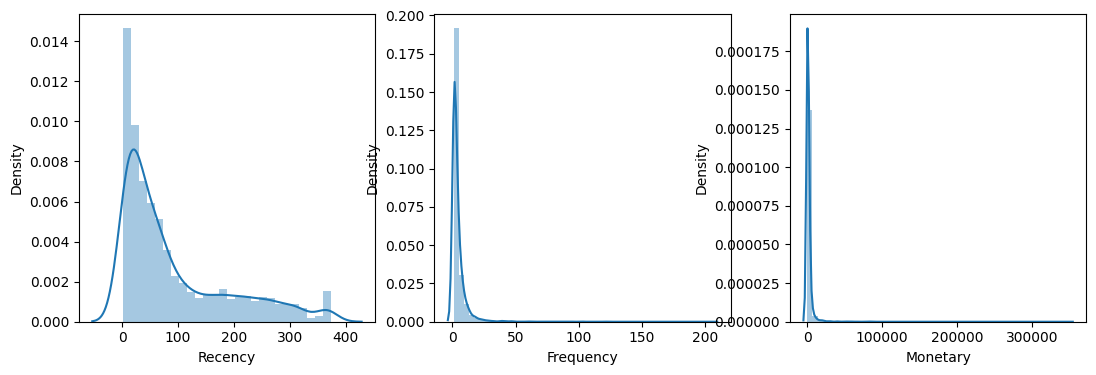

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(13,4))
# Recency distribution
sns.distplot(rfm_data['Recency'], ax = ax[0])
# Frequency distribution
sns.distplot(rfm_data['Frequency'], ax = ax[1])
# Monetary distribution
sns.distplot(rfm_data['Monetary'], ax = ax[2])
plt.show()

Note:
- Recency distribution is right-skewed
- Frequency distribution is right-skewed leptokurtic
- Monetary distribution is right-skewed and leptokurtic

All three fields do not follow a normal distribution of data.
So we cann't use this data to apply to K mean model


## **Transformation**
- Log transformation
- Square root transformation
- Box-cox transformation
- Cube root transformation


**Function: Analyze_skewness**

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2,3, figsize=(5,5))
    sns.distplot(rfm_data[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_data[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_data[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_data[x])[0], ax=ax[1,1])
    sns.histplot(np.cbrt(rfm_data[x]), ax=ax[1, 2])
    plt.tight_layout()
    plt.show()

    print("Original Skewness:", rfm_data[x].skew().round(2))
    print("Log-transformed Skewness:", np.log(rfm_data[x]).skew().round(2))
    print("Square Root-transformed Skewness:", np.sqrt(rfm_data[x]).skew().round(2))
    print("Box-Cox transformed Skewness:", pd.Series(stats.boxcox(rfm_data[x])[0]).skew().round(2))
    print("Cube Root-transformed Skewness:", pd.Series(np.cbrt(rfm_data[x])).skew().round(2))


### **Recency**

<ipython-input-21-1d775efe9da3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_data[x], ax=ax[0,0])
<ipython-input-21-1d775efe9da3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_data[x]), ax=ax[0,1])
<ipython-input-21-1d775efe9da3>:6: UserWarning: 

`distplot` is a deprecated

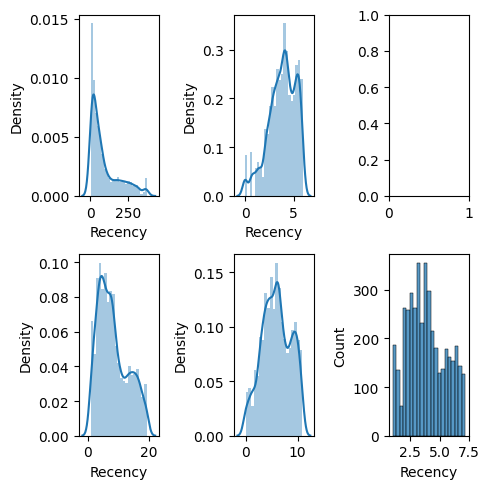

Original Skewness: 1.28
Log-transformed Skewness: -0.61
Square Root-transformed Skewness: 0.59
Box-Cox transformed Skewness: -0.07
Cube Root-transformed Skewness: 0.27


In [ ]:
analyze_skewness('Recency')

###**Frequency**

<ipython-input-21-1d775efe9da3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_data[x], ax=ax[0,0])
<ipython-input-21-1d775efe9da3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_data[x]), ax=ax[0,1])
<ipython-input-21-1d775efe9da3>:6: UserWarning: 

`distplot` is a deprecated

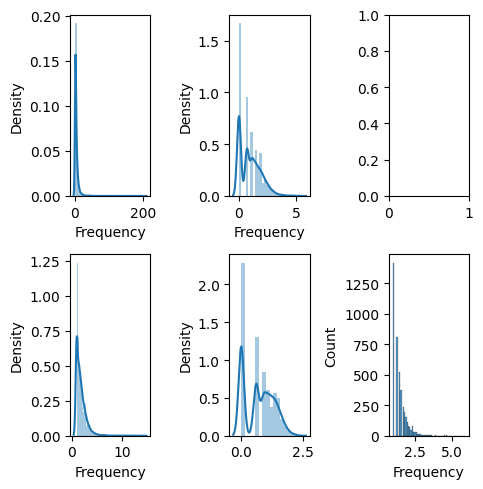

Original Skewness: 10.55
Log-transformed Skewness: 0.74
Square Root-transformed Skewness: 3.12
Box-Cox transformed Skewness: 0.13
Cube Root-transformed Skewness: 1.96


In [ ]:
analyze_skewness('Frequency')

### **Monetary**

<ipython-input-21-1d775efe9da3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_data[x], ax=ax[0,0])
<ipython-input-21-1d775efe9da3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_data[x]), ax=ax[0,1])
<ipython-input-21-1d775efe9da3>:6: UserWarning: 

`distplot` is a deprecated

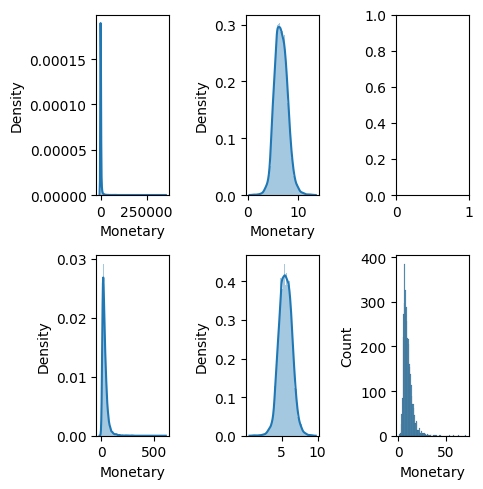

Original Skewness: 24.0
Log-transformed Skewness: 0.25
Square Root-transformed Skewness: 5.8
Box-Cox transformed Skewness: -0.01
Cube Root-transformed Skewness: 2.77


In [ ]:
analyze_skewness('Monetary')

Note: All data fields are well-suited for Box-Cox transformation as the Box-Cox values are closest to zero.

###**Tranform to new DataFrame**

In [ ]:
rfm_data_t=pd.DataFrame()
# Tranform Recency to box-cox transformation
rfm_data_t['Recency']=stats.boxcox(rfm_data['Recency'])[0]
# Tranform Frequency to box-cox transformation
rfm_data_t['Frequency']=stats.boxcox(rfm_data['Frequency'])[0]
# Tranform Monetary to box-cox transformation
rfm_data_t['Monetary']=stats.boxcox(rfm_data['Monetary'])[0]
print(rfm_data_t)

        Recency  Frequency  Monetary
0      8.586799   1.581456  5.074620
1      1.220710   0.610364  5.966666
2      6.637446   0.000000  4.692189
3      5.475524   0.900384  6.435838
4      3.031974   0.000000  4.917612
...         ...        ...       ...
4307   3.843143   1.304605  5.439294
4308   6.415764   0.000000  5.229364
4309  10.205177   0.000000  5.173016
4310   7.608103   0.610364  5.952686
4311   3.843143   1.080986  6.350378

[4312 rows x 3 columns]


In [ ]:
rfm_data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4312 non-null   float64
 1   Frequency  4312 non-null   float64
 2   Monetary   4312 non-null   float64
dtypes: float64(3)
memory usage: 101.2 KB


### **Scaler data**

In [ ]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_data_t)
rfm_data_t_scaler = scaler.transform(rfm_data_t)
pd.DataFrame(rfm_data_t_scaler)

,0,1,2
0,0.980589,1.455024,-0.510691
1,-1.712834,-0.182770,0.482254
2,0.267805,-1.212179,-0.936378
3,-0.157054,0.306364,1.004493
4,-1.050542,-1.212179,-0.685457
...,...,...,...
4307,-0.753937,0.988102,-0.104768
4308,0.186747,-1.212179,-0.338443
4309,1.572352,-1.212179,-0.401165
4310,0.622727,-0.182770,0.466692


In [ ]:
# Create DataFrame  rfm_data_t_scaler
column_names = ['Recency', 'Frequency', 'Monetary']
rfm_data_t_scaler = pd.DataFrame(data=rfm_data_t_scaler, columns=column_names)

## **Use K-Mean to Clustering**

###**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

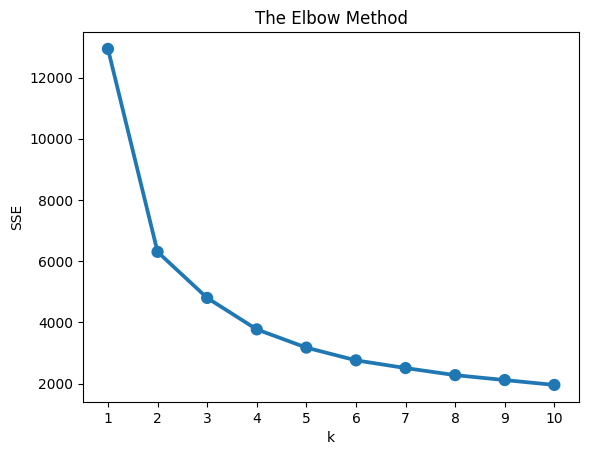

In [ ]:

# Use Elbow Method
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data_t_scaler)
    sse[k] = kmeans.inertia_
# Visualization
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


**Note: This is result of using Elbow Method and with k = 4 will be best choice.**

### **Silhouette Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

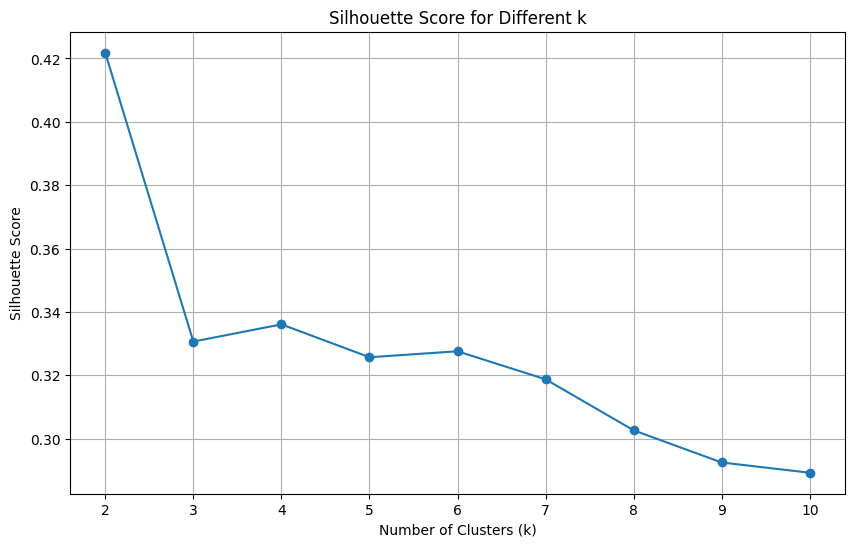

Best k value based on Silhouette Score: 2


In [ ]:
# Using Silhouette Method
silhouette_scores = []
possible_k_values = range(2, 11)  # k from 2 to 10
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data_t_scaler)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm_data_t_scaler, labels))

# Visualize Silhouette Score for each k value
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# Choose the best k
best_k = possible_k_values[np.argmax(silhouette_scores)]
print(f"Best k value based on Silhouette Score: {best_k}")

**Note: The best k is the k which has highest Silhouette Score, but with k = 2, the clusters are not good. Let Visualize it.**

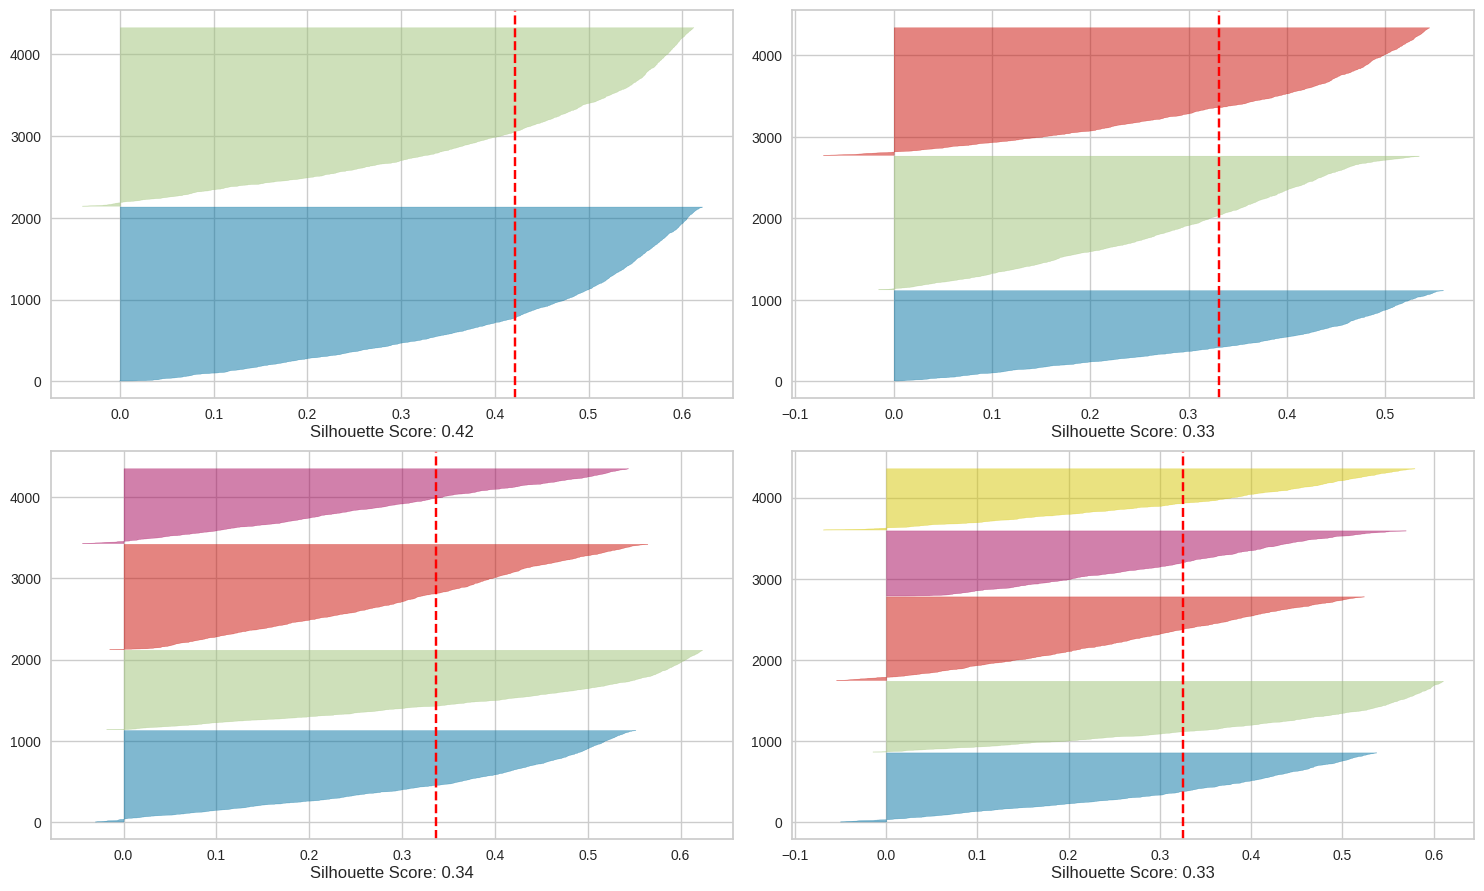

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# Visualize
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
for idx, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(idx, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(rfm_data_t_scaler)
    ax[q][mod].text(0.5, -0.1, f'Silhouette Score: {np.mean(visualizer.silhouette_score_):.2f}', size=12, ha='center', transform=ax[q][mod].transAxes)
plt.tight_layout()
plt.show()

Note: As the graph visualized above is:
- With k = 2 has the highest Silhouette Score, however the number of clusters will not be covered.
- With k = 4 having the highest Silhouette Score of the remaining k, showing the number of good clusters.
***From the two methods, Eibow and Silhouette, both give the conclusion that k = 4**

###**Clustering**

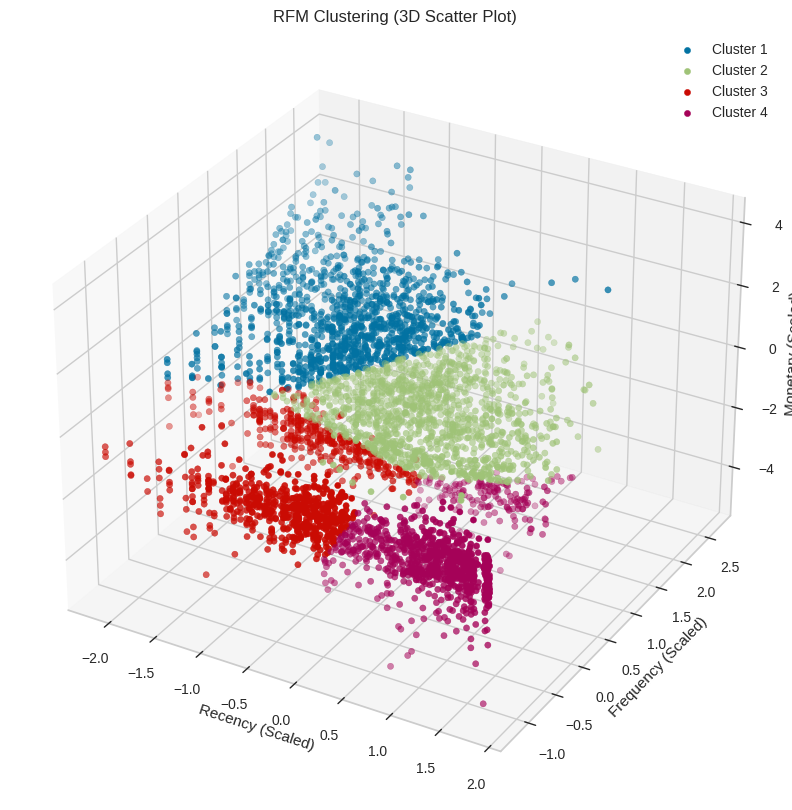

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
#Choose k = 4 and fit it with data
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
clusters = kmeans.fit_predict(rfm_data_t_scaler)
rfm_data_t_scaler['Cluster'] = clusters
rfm_data['Cluster'] = clusters

# Visualize with 3D graph by Recency, Frequency and Monetary
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    cluster_data = rfm_data_t_scaler[rfm_data_t_scaler['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i+1}')

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')
ax.set_title('RFM Clustering (3D Scatter Plot)')
ax.legend()
plt.show()



In [ ]:

rfm_data.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,16.05,10.85,5682.21
1,36.51,1.41,383.47
2,91.34,3.55,1381.49
3,228.80,1.17,280.44


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Recency'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Monetary'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Recency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Monetary'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['Recency', 'Frequency'], ['Frequency', 'Monetary']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['Recency', 'Frequency', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Recency', 'Monetary', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Recency', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['Recency'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['Monetary'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['Recency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['Monetary'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_16, *[[['Recency', 'Frequency'], ['Frequency', 'Monetary']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['Recency', 'Frequency', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_18, *['Recency', 'Monetary', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_19, *['Recency', 'count()', None], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
